In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import sklearn
import warnings
warnings.filterwarnings('ignore')
import sys
plt.rc("font", family="Malgun Gothic")

In [2]:
apt_price = pd.read_csv('./아파트csv/apt_price.csv',encoding='utf8')
apt_price.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,거래유형,중개사소재지,구,동,평,거래금액_억원,계약년,계약월,평형
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201205,1,66000,4,...,언주로 103,-,-,강남구,개포동,25.7,6.60,2012,5,20평대
1,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201207,9,58000,2,...,언주로 103,-,-,강남구,개포동,25.7,5.80,2012,7,20평대
2,서울특별시 강남구 개포동,652,652,0,개포우성3차,104.43,201204,13,85000,6,...,개포로 307,-,-,강남구,개포동,34.5,8.50,2012,4,30평대
3,서울특별시 강남구 개포동,12-2,12,2,개포자이(12-2),134.30,201205,8,119500,14,...,개포로109길 69,-,-,강남구,개포동,44.3,11.95,2012,5,40평대
4,서울특별시 강남구 개포동,141,141,0,개포주공1단지,50.38,201201,9,77500,1,...,개포로,-,-,강남구,개포동,16.6,7.75,2012,1,10평대


## 중복 혹은 영향없는 컬럼들 제거

In [3]:
apt_price = apt_price.drop(columns=['시군구','계약년월','본번','부번','중개사소재지','거래유형','도로명','거래금액_억원'])
apt_price

,번지,단지명,전용면적(㎡),계약일,거래금액(만원),층,건축년도,구,동,평,계약년,계약월,평형
0,655-2,개포2차현대아파트(220),77.75,1,66000,4,1988,강남구,개포동,25.7,2012,5,20평대
1,655-2,개포2차현대아파트(220),77.75,9,58000,2,1988,강남구,개포동,25.7,2012,7,20평대
2,652,개포우성3차,104.43,13,85000,6,1984,강남구,개포동,34.5,2012,4,30평대
3,12-2,개포자이(12-2),134.30,8,119500,14,2004,강남구,개포동,44.3,2012,5,40평대
4,141,개포주공1단지,50.38,9,77500,1,1982,강남구,개포동,16.6,2012,1,10평대
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824116,450,한신아파트(103~109),59.76,20,74000,3,1997,중랑구,중화동,19.7,2022,7,10평대
824117,450,한신아파트(103~109),84.03,27,91500,12,1997,중랑구,중화동,27.7,2022,7,20평대
824118,274-51,한영(101),84.69,4,50000,2,2003,중랑구,중화동,28.0,2021,11,20평대
824119,274-51,한영(101),84.69,9,49900,7,2003,중랑구,중화동,28.0,2022,4,20평대


## 거래금액 정규화 및 분포도(왜도, 첨도) 확인

transaction_real_price -> Skewness: 0.282882, Kurtosis: 0.328009


<AxesSubplot:xlabel='거래금액_정규화', ylabel='Density'>

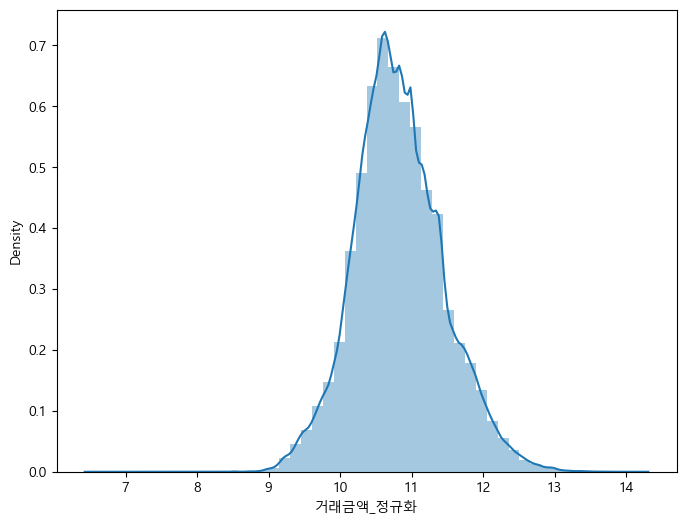

In [4]:
apt_price['거래금액_정규화'] = np.log1p(apt_price['거래금액(만원)'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('transaction_real_price',apt_price['거래금액_정규화'].skew(),apt_price['거래금액_정규화'].kurt()))

f,ax=plt.subplots(figsize=(8,6))
sns.distplot(apt_price['거래금액_정규화'])

## 상관관계 분석

<AxesSubplot:>

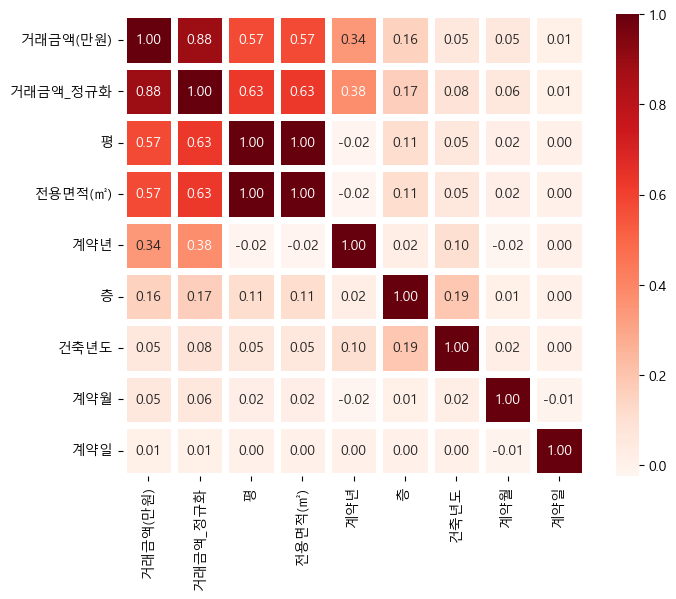

In [5]:
k=apt_price.shape[1]
corrmat=apt_price.corr()
cols=corrmat.nlargest(k,'거래금액(만원)')['거래금액(만원)'].index
cm=np.corrcoef(apt_price[cols].values.T)
f,ax=plt.subplots(figsize=(8,6))
sns.heatmap(data=cm,annot=True,square=True,fmt='.2f',linewidths=5,cmap='Reds',yticklabels=cols.values,xticklabels=cols.values)

## 행정구, 행정동 라벨링

In [6]:
apt_dong = apt_price[['거래금액(만원)','동']].groupby('동').mean().sort_values('거래금액(만원)').reset_index()
apt_dong.head()

,동,거래금액(만원)
0,장충동2가,11038.055556
1,영등포동3가,11513.472222
2,미근동,12550.000000
3,원남동,13830.695652
4,영등포동4가,13988.690476


In [7]:
apt_gu = apt_price[['거래금액(만원)','구']].groupby('구').mean().sort_values('거래금액(만원)').reset_index()
apt_gu.head()

,구,거래금액(만원)
0,도봉구,34113.562705
1,금천구,35767.073999
2,노원구,36373.074983
3,중랑구,37635.783277
4,강북구,40631.607331


## 한강인근인지 여부

In [8]:
apt_price['한강']= apt_price['동'].isin(['성수동1가','삼성동','이촌동','공덕동','서교동','한강로3가','목동']).astype(int)

In [10]:
Gu_num={}
for i in range(len(apt_gu)):
    Gu=apt_gu['구'].iloc[i]
    Gu_num[Gu]=i
Gu_num

{'도봉구': 0,
 '금천구': 1,
 '노원구': 2,
 '중랑구': 3,
 '강북구': 4,
 '구로구': 5,
 '관악구': 6,
 '은평구': 7,
 '강서구': 8,
 '동대문구': 9,
 '성북구': 10,
 '서대문구': 11,
 '강동구': 12,
 '영등포구': 13,
 '종로구': 14,
 '양천구': 15,
 '동작구': 16,
 '중구': 17,
 '마포구': 18,
 '광진구': 19,
 '성동구': 20,
 '송파구': 21,
 '용산구': 22,
 '서초구': 23,
 '강남구': 24}

In [11]:
dong_num={}
for i in range(len(apt_dong)):
    dong=apt_dong['동'].iloc[i]
    dong_num[dong]=i
dong_num

{'장충동2가': 0,
 '영등포동3가': 1,
 '미근동': 2,
 '원남동': 3,
 '영등포동4가': 4,
 '영등포동1가': 5,
 '영등포동2가': 6,
 '당산동6가': 7,
 '충신동': 8,
 '필동1가': 9,
 '안암동4가': 10,
 '누상동': 11,
 '행촌동': 12,
 '연지동': 13,
 '연건동': 14,
 '남창동': 15,
 '인현동2가': 16,
 '명륜3가': 17,
 '동숭동': 18,
 '동소문동6가': 19,
 '안암동3가': 20,
 '대조동': 21,
 '성북동': 22,
 '오장동': 23,
 '통인동': 24,
 '노고산동': 25,
 '충무로5가': 26,
 '익선동': 27,
 '가산동': 28,
 '화양동': 29,
 '쌍문동': 30,
 '산림동': 31,
 '창천동': 32,
 '가리봉동': 33,
 '사근동': 34,
 '효제동': 35,
 '신설동': 36,
 '갈현동': 37,
 '원효로2가': 38,
 '삼선동5가': 39,
 '원효로3가': 40,
 '수유동': 41,
 '신영동': 42,
 '도봉동': 43,
 '낙원동': 44,
 '번동': 45,
 '영등포동5가': 46,
 '상계동': 47,
 '오류동': 48,
 '방학동': 49,
 '묵정동': 50,
 '청파동1가': 51,
 '중곡동': 52,
 '망우동': 53,
 '궁동': 54,
 '상도1동': 55,
 '구산동': 56,
 '신내동': 57,
 '신월동': 58,
 '동선동4가': 59,
 '공릉동': 60,
 '시흥동': 61,
 '구로동': 62,
 '능동': 63,
 '월계동': 64,
 '문래동2가': 65,
 '동선동5가': 66,
 '중화동': 67,
 '동선동3가': 68,
 '보문동2가': 69,
 '이화동': 70,
 '숭인동': 71,
 '창동': 72,
 '면목동': 73,
 '역촌동': 74,
 '우이동': 75,
 '홍익동': 76,
 '방화동': 77,
 '수송동': 78,
 '신림동': 79,
 

In [12]:
apt_price = apt_price.replace({'동':dong_num, '구':Gu_num})
apt_price.head()

,번지,단지명,전용면적(㎡),계약일,거래금액(만원),층,건축년도,구,동,평,계약년,계약월,평형,거래금액_정규화,한강
0,655-2,개포2차현대아파트(220),77.75,1,66000,4,1988,24,293,25.7,2012,5,20평대,11.097425,0
1,655-2,개포2차현대아파트(220),77.75,9,58000,2,1988,24,293,25.7,2012,7,20평대,10.968216,0
2,652,개포우성3차,104.43,13,85000,6,1984,24,293,34.5,2012,4,30평대,11.350418,0
3,12-2,개포자이(12-2),134.30,8,119500,14,2004,24,293,44.3,2012,5,40평대,11.691080,0
4,141,개포주공1단지,50.38,9,77500,1,1982,24,293,16.6,2012,1,10평대,11.258046,0


## 층 같은 경우 음수(-1층)이 있기에 +5를 더해주고 로그를 취해준다

In [13]:
apt_price['층'] = np.log(apt_price['층']+5)

## 번지,단지명, 평형 등 필요없는 훈련에 필요없는 컬럼들 제거

In [14]:
drop_columns = ['번지','단지명','평형','거래금액_정규화']
apt_price = apt_price.drop(drop_columns,axis=1)
apt_price.head()

,전용면적(㎡),계약일,거래금액(만원),층,건축년도,구,동,평,계약년,계약월,한강
0,77.75,1,66000,2.197225,1988,24,293,25.7,2012,5,0
1,77.75,9,58000,1.945910,1988,24,293,25.7,2012,7,0
2,104.43,13,85000,2.397895,1984,24,293,34.5,2012,4,0
3,134.30,8,119500,2.944439,2004,24,293,44.3,2012,5,0
4,50.38,9,77500,1.791759,1982,24,293,16.6,2012,1,0


## 재건축 가능성 유무, 건물 나이(거래년-건축년) 컬럼 추가

In [15]:
for dataset in [apt_price]:
    dataset['건물나이'] = dataset['계약년'] - dataset['건축년도']
    dataset['재건축'] = (dataset['건물나이']>=30).astype(int)

## 첨도 왜도를 비교하여 정규화

In [16]:
train_columns=[]
for column in apt_price.columns[:]:
    if apt_price[column].skew()>=1: # 오른쪽 꼬리로 늘어진 그래프인가?
        print('%s -> Skewness: %f, Kurtosis: %f'%(column,apt_price[column].skew(),apt_price[column].kurt()))
        train_columns.append(column)
    elif apt_price[column].kurt()>=3: # 아닐 경우 표준정규분포와 비교해서 얼마나 뾰족한가?
        print('%s -->Skewness: %f, Kurtosis: %f'%(column,apt_price[column].skew(),apt_price[column].kurt()))
        train_columns.append(column)
train_columns

전용면적(㎡) -> Skewness: 1.168015, Kurtosis: 3.587820
거래금액(만원) -> Skewness: 3.454726, Kurtosis: 24.435209
평 -> Skewness: 1.169825, Kurtosis: 3.594030
한강 -> Skewness: 4.966377, Kurtosis: 22.664955
재건축 -> Skewness: 2.348208, Kurtosis: 3.514091


['전용면적(㎡)', '거래금액(만원)', '평', '한강', '재건축']

In [17]:
for column in train_columns :
    apt_price[column] = np.log1p(apt_price[column])
    print("%s -> Skewness: %f, Kurtosis: %f" %  (column,apt_price[column].skew(), 
                                                 apt_price[column].kurt()))

전용면적(㎡) -> Skewness: -0.955799, Kurtosis: 3.005453
거래금액(만원) -> Skewness: 0.282882, Kurtosis: 0.328009
평 -> Skewness: -0.858054, Kurtosis: 2.687105
한강 -> Skewness: 4.966377, Kurtosis: 22.664955
재건축 -> Skewness: 2.348208, Kurtosis: 3.514091


<AxesSubplot:>

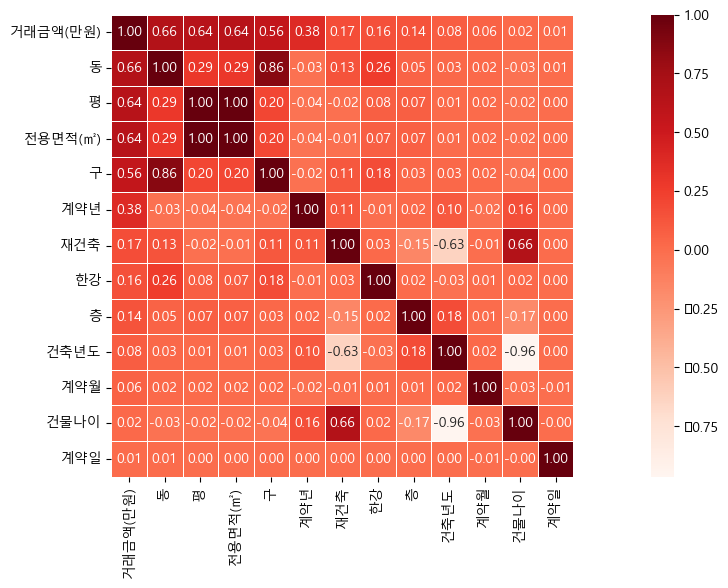

In [18]:
k=apt_price.shape[1] #히트맵 변수 갯수
corrmat = apt_price.corr() #변수간의 상관관계
cols = corrmat.nlargest(k, '거래금액(만원)')['거래금액(만원)'].index #price기준으로 제일 큰순서대로 20개를 뽑아냄
cm = np.corrcoef(apt_price[cols].values.T)
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds', 
            yticklabels = cols.values, xticklabels = cols.values)

In [19]:
apt_price.to_csv('아파트_전처리.csv',index=False)

In [5]:
apt_price = pd.read_csv('../../아파트csv/아파트 실거래 병합/apt_price.csv',encoding='utf8')
apt_price['전용면적(㎡)'].nunique()

13866

In [11]:
apt_price.groupby(['단지명','전용면적(㎡)'])[['거래금액(만원)']].sum()

거래금액(만원)
단지명          전용면적(㎡)          
(1-10)       75.70       15000
(1-102)      26.64       15000
             33.33       17500
             59.97       17000
             69.54       17000
...                        ...
힐하우스         241.11     151000
             241.78     135000
힐하우스(577-79) 88.35       59000
힐하우스(802-3)  212.48      87000
             221.51      80000

[33046 rows x 1 columns]

In [10]:
apt_price[apt_price['단지명']=='(1-102)']

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,거래유형,중개사소재지,구,동,평,거래금액_억원,계약년,계약월,평형
159920,서울특별시 종로구 명륜3가,1-102,1,102,(1-102),69.54,201405,9,17000,-1,...,명륜2길 9-14,-,-,종로구,명륜3가,23.0,1.70,2014,5,20평대
159921,서울특별시 종로구 명륜3가,1-102,1,102,(1-102),59.97,201405,9,17000,2,...,명륜2길 9-14,-,-,종로구,명륜3가,19.8,1.70,2014,5,10평대
386667,서울특별시 종로구 명륜3가,1-102,1,102,(1-102),70.05,201607,30,19000,1,...,명륜2길 9-14,-,-,종로구,명륜3가,23.1,1.90,2016,7,20평대
495348,서울특별시 종로구 명륜3가,1-102,1,102,(1-102),70.05,201611,28,19000,1,...,명륜2길 9-14,-,-,종로구,명륜3가,23.1,1.90,2016,11,20평대
644889,서울특별시 종로구 명륜3가,1-102,1,102,(1-102),26.64,201905,10,7500,3,...,명륜2길 9-14,-,-,종로구,명륜3가,8.8,0.75,2019,5,10평이하
644890,서울특별시 종로구 명륜3가,1-102,1,102,(1-102),26.64,201905,10,7500,4,...,명륜2길 9-14,-,-,종로구,명륜3가,8.8,0.75,2019,5,10평이하
644891,서울특별시 종로구 명륜3가,1-102,1,102,(1-102),33.33,201905,10,8700,3,...,명륜2길 9-14,-,-,종로구,명륜3가,11.0,0.87,2019,5,10평대
644892,서울특별시 종로구 명륜3가,1-102,1,102,(1-102),33.33,201905,10,8800,4,...,명륜2길 9-14,-,-,종로구,명륜3가,11.0,0.88,2019,5,10평대
